# Metal Price within last 30 years (Machine Learning Practicing)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings

warnings.filterwarnings('ignore')

df = pd.read_csv('../input/-metals-price-changes-within-last-30-years/alum_gold_nickel_silver_uran_price_changes.csv')
df.dropna(inplace=True)
df

Year Month  Price_alum Price_gold  Price_nickel  Price_silver  \
0    1992.0   Feb     1266.83     353.91       7861.90          4.15   
1    1992.0   Mar     1280.47     344.34       7417.70          4.11   
2    1992.0   Apr     1317.05     338.62       7420.60          4.05   
3    1992.0   May     1306.79     337.24       7326.80          4.07   
4    1992.0   Jun     1275.55     340.81       7192.80          4.06   
..      ...   ...         ...        ...           ...           ...   
353  2021.0   Jul     2497.64    1807.84      18818.51         25.68   
354  2021.0   Aug     2602.99    1785.28      19141.30         23.99   
355  2021.0   Sep     2834.56    1775.14      19376.88         23.19   
356  2021.0   Oct     2934.39    1776.85      19362.39         23.41   
357  2021.0   Nov     2636.45    1821.76      19932.86         24.18   

     Price_uran  Inflation_rate  Price_alum_infl  Price_gold_infl  \
0          7.90           89.59      2401.782997       670.977969   
1          7.75           89.59      2427.643073       652.834206   
2          7.75           89.59      2496.995095       641.989658   
3          7.55           89.59      2477.543161       639.373316   
4          7.75           89.59      2418.315245       646.141679   
..          ...             ...              ...              ...   
353       32.34           -1.29      2465.420444      1784.518864   
354       32.15           -1.29      2569.411429      1762.249888   
355       45.08           -1.29      2797.994176      1752.240694   
356       38.48           -1.29      2896.536369      1753.928635   
357       31.10           -1.29      2602.439795      1798.259296   

     Price_nickel_infl  Price_silver_infl  Price_uran_infl  
0         14905.376210           7.867985        14.977610  
1         14063.217430           7.792149        14.693225  
2         14068.715540           7.678395        14.693225  
3         13890.880120           7.716313        14.314045  
4         13636.829520           7.697354        14.693225  
..                 ...                ...              ...  
353       18575.751221          25.348728        31.922814  
354       18894.377230          23.680529        31.735265  
355       19126.918248          22.890849        44.498468  
356       19112.615169          23.108011        37.983608  
357       19675.726106          23.868078        30.698810  

[346 rows x 13 columns]

<AxesSubplot:>

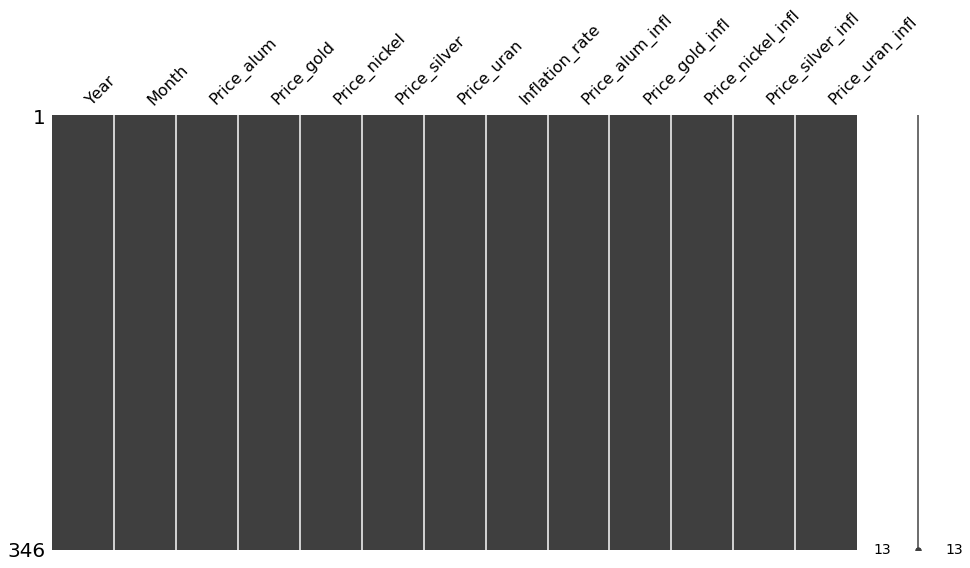

In [4]:
# Check again to find NULLS

msno.matrix(df,figsize=(16,8))

In [5]:
# Arrangement of column

df['Year'] = df['Year'].astype('str')
df['Year'] = df['Year'].str[:4]

df.head()

Year Month  Price_alum Price_gold  Price_nickel  Price_silver  Price_uran  \
0  1992   Feb     1266.83     353.91        7861.9          4.15        7.90   
1  1992   Mar     1280.47     344.34        7417.7          4.11        7.75   
2  1992   Apr     1317.05     338.62        7420.6          4.05        7.75   
3  1992   May     1306.79     337.24        7326.8          4.07        7.55   
4  1992   Jun     1275.55     340.81        7192.8          4.06        7.75   

   Inflation_rate  Price_alum_infl  Price_gold_infl  Price_nickel_infl  \
0           89.59      2401.782997       670.977969        14905.37621   
1           89.59      2427.643073       652.834206        14063.21743   
2           89.59      2496.995095       641.989658        14068.71554   
3           89.59      2477.543161       639.373316        13890.88012   
4           89.59      2418.315245       646.141679        13636.82952   

   Price_silver_infl  Price_uran_infl  
0           7.867985        14.977610  
1           7.792149        14.693225  
2           7.678395        14.693225  
3           7.716313        14.314045  
4           7.697354        14.693225

In [6]:
#Add the gold price (without inflation rate) column

df['Price_gold'] = df['Price_gold_infl'] / ((df['Inflation_rate']/100 + 1))
df['Price_gold']

0       353.91
1       344.34
2       338.62
3       337.24
4       340.81
        ...   
353    1807.84
354    1785.28
355    1775.14
356    1776.85
357    1821.76
Name: Price_gold, Length: 346, dtype: float64

Go on with no inflation version 

In [7]:
# Separate the dataframe

df_inf = df[['Year','Month','Price_alum_infl','Price_gold_infl','Price_nickel_infl','Price_silver_infl','Price_uran_infl']]
df_real =  df[['Year','Month','Price_alum','Price_gold','Price_nickel','Price_silver','Price_uran']]
inf_rate = df[['Year','Inflation_rate']].groupby(['Year']).mean()
yymm = df[['Year','Month']]

display(df_inf.head())
display(df_real.head())
display(inf_rate.head())

Year Month  Price_alum_infl  Price_gold_infl  Price_nickel_infl  \
0  1992   Feb      2401.782997       670.977969        14905.37621   
1  1992   Mar      2427.643073       652.834206        14063.21743   
2  1992   Apr      2496.995095       641.989658        14068.71554   
3  1992   May      2477.543161       639.373316        13890.88012   
4  1992   Jun      2418.315245       646.141679        13636.82952   

   Price_silver_infl  Price_uran_infl  
0           7.867985        14.977610  
1           7.792149        14.693225  
2           7.678395        14.693225  
3           7.716313        14.314045  
4           7.697354        14.693225

Year Month  Price_alum  Price_gold  Price_nickel  Price_silver  Price_uran
0  1992   Feb     1266.83      353.91        7861.9          4.15        7.90
1  1992   Mar     1280.47      344.34        7417.7          4.11        7.75
2  1992   Apr     1317.05      338.62        7420.6          4.05        7.75
3  1992   May     1306.79      337.24        7326.8          4.07        7.55
4  1992   Jun     1275.55      340.81        7192.8          4.06        7.75

Inflation_rate
Year                
1992           89.59
1993           84.15
1994           79.47
1995           74.58
1996           69.60

In [8]:
# Change rate in period
df_rate = df_real[['Price_alum','Price_gold','Price_nickel','Price_silver','Price_uran']].pct_change()
df_rate = pd.concat([yymm, df_rate],axis=1)
df_rate.fillna(method='bfill',inplace=True)
df_rate

Year Month  Price_alum  Price_gold  Price_nickel  Price_silver  \
0    1992   Feb    0.010767   -0.027041     -0.056500     -0.009639   
1    1992   Mar    0.010767   -0.027041     -0.056500     -0.009639   
2    1992   Apr    0.028568   -0.016611      0.000391     -0.014599   
3    1992   May   -0.007790   -0.004075     -0.012640      0.004938   
4    1992   Jun   -0.023906    0.010586     -0.018289     -0.002457   
..    ...   ...         ...         ...           ...           ...   
353  2021   Jul    0.020841   -0.014570      0.046661     -0.048889   
354  2021   Aug    0.042180   -0.012479      0.017153     -0.065810   
355  2021   Sep    0.088963   -0.005680      0.012307     -0.033347   
356  2021   Oct    0.035219    0.000963     -0.000748      0.009487   
357  2021   Nov   -0.101534    0.025275      0.029463      0.032892   

     Price_uran  
0     -0.018987  
1     -0.018987  
2      0.000000  
3     -0.025806  
4      0.026490  
..          ...  
353    0.006223  
354   -0.005875  
355    0.402177  
356   -0.146406  
357   -0.191788  

[346 rows x 7 columns]

<AxesSubplot:title={'center':'Change rate'}, xlabel='Year'>

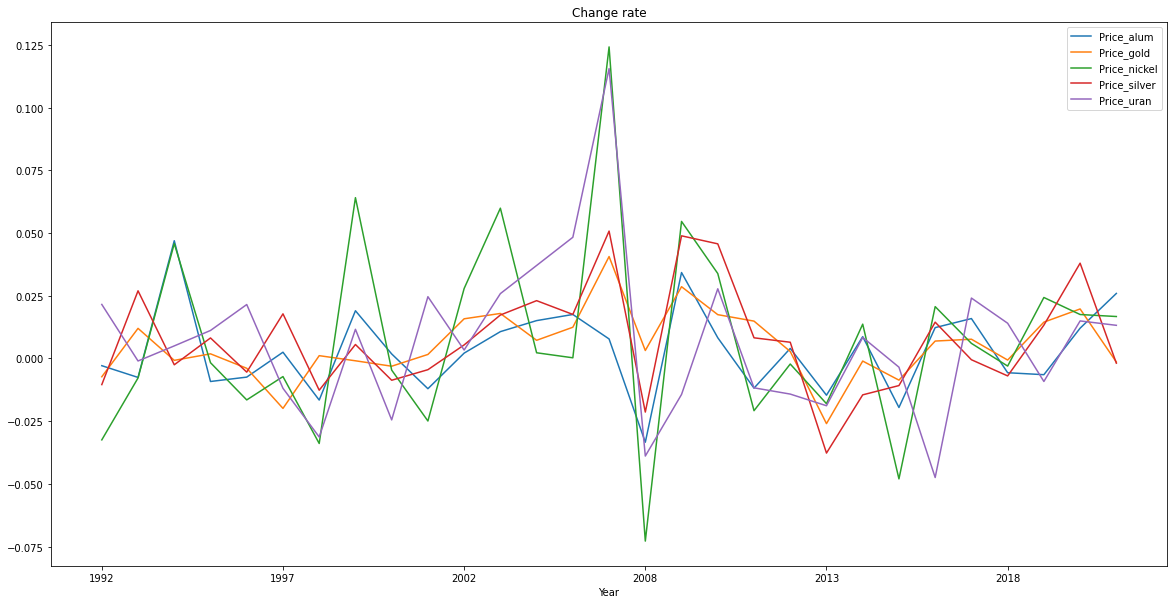

In [9]:
df_rate.groupby(['Year']).mean().plot(title='Change rate',figsize=(20,10))

With this plot, it seems the change rates of each metal are going similar. So it would be meaningful to find out correlation of each metal.

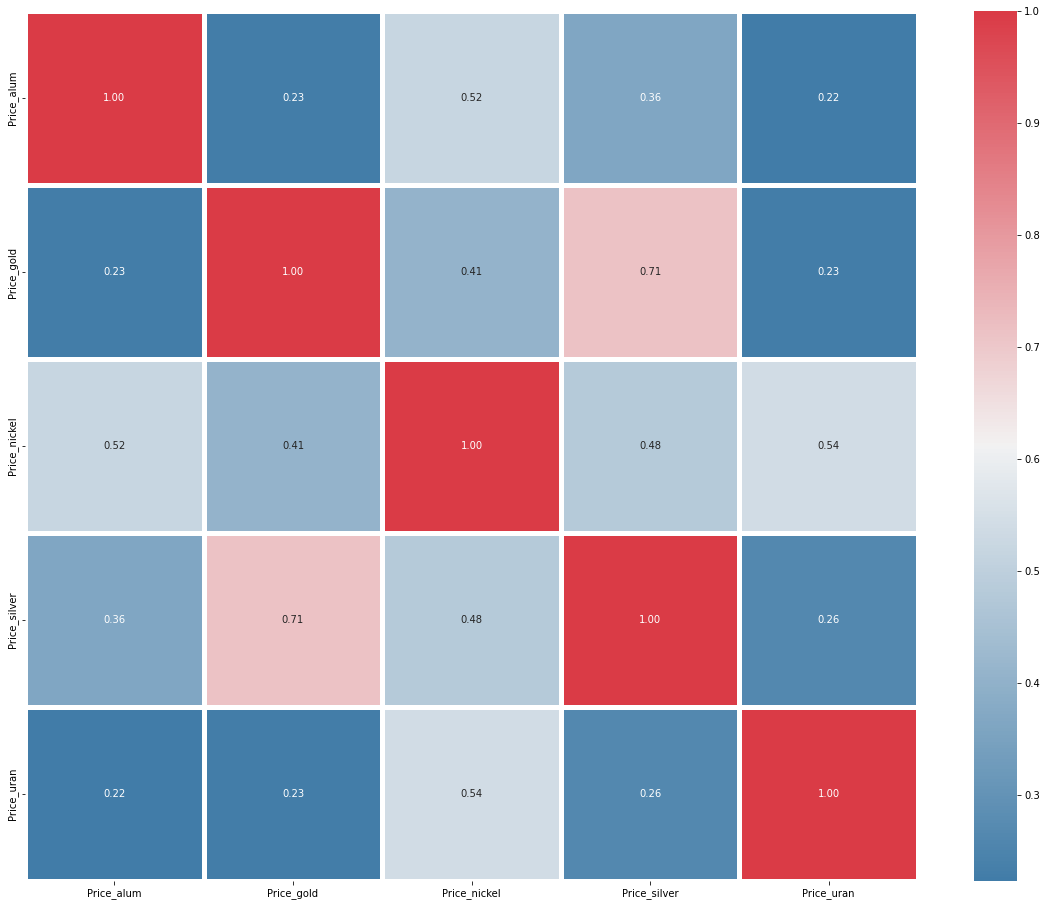

In [10]:
# Correlation Visualization

cmap = sns.diverging_palette(240,10,n=9,as_cmap=True)

plt.figure(figsize=(20,16))
sns.heatmap(df_rate.corr(),annot=True,linewidths=5,cmap=cmap,fmt='.2f',annot_kws={'size':10})

plt.show()

The most correlative of gold is silver (0.71) and following is nickel. So independent variable will be Silver and Nickel, and the target data will be gold price changes.

In [11]:
# Convert the data boolean class of gold price and add the column 

def rate(data):
    if data <= 0:
        return 0
    else:
        return 1

df_rate['target'] = df_rate['Price_gold'].apply(rate)
df_rate.head()

Year Month  Price_alum  Price_gold  Price_nickel  Price_silver  Price_uran  \
0  1992   Feb    0.010767   -0.027041     -0.056500     -0.009639   -0.018987   
1  1992   Mar    0.010767   -0.027041     -0.056500     -0.009639   -0.018987   
2  1992   Apr    0.028568   -0.016611      0.000391     -0.014599    0.000000   
3  1992   May   -0.007790   -0.004075     -0.012640      0.004938   -0.025806   
4  1992   Jun   -0.023906    0.010586     -0.018289     -0.002457    0.026490   

   target  
0       0  
1       0  
2       0  
3       0  
4       1

In [15]:
# Set train data and test data
# Prepare different feature column set to compare the model

X1 = df_rate[['Price_silver','Price_nickel']]
X2 = df_rate[['Price_silver']]
y = df_rate['target']

In [16]:
# Separate the date set into train and test

X1_train = X1[:266]
X1_test = X1[267:]

X2_train = X2[:266]
X2_test = X2[267:]

y_train = y[:266]
y_test = y[267:]

## Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

model_lr1 = LogisticRegression()
model_lr1.fit(X1_train,y_train)

model_lr1.score(X1_test,y_test) #Accuracy Score

0.7721518987341772

In [18]:
#Summary of statistical analysis of first model

model=sm.Logit(y_train,X1_train)
results=model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.497174
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                  266
Model:                          Logit   Df Residuals:                      264
Method:                           MLE   Df Model:                            1
Date:                Tue, 30 Aug 2022   Pseudo R-squ.:                  0.2827
Time:                        16:16:03   Log-Likelihood:                -132.25
converged:                       True   LL-Null:                       -184.37
Covariance Type:            nonrobust   LLR p-value:                 1.790e-24
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Price_silver    29.8082      4.207      7.085      0.000      21.562      38.055
Price_nickel     0.6238      2.029      0.307      0.758      -3.352       4.600
================================================================================
"""

P_value of nickel is over evel of significance, so first logistic regression model cannot be adopted

In [19]:
# Only one feature model

model_lr2 = LogisticRegression()
model_lr2.fit(X2_train,y_train)

model_lr2.score(X2_test,y_test) #Accuracy Score

0.810126582278481

In [20]:
#Summary of statistical analysis of second model

model=sm.Logit(y_train,X2_train)
results=model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.497352
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                  266
Model:                          Logit   Df Residuals:                      265
Method:                           MLE   Df Model:                            0
Date:                Tue, 30 Aug 2022   Pseudo R-squ.:                  0.2824
Time:                        16:16:08   Log-Likelihood:                -132.30
converged:                       True   LL-Null:                       -184.37
Covariance Type:            nonrobust   LLR p-value:                       nan
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Price_silver    30.0755      4.128      7.285      0.000      21.984      38.167
================================================================================
"""

Second model of logistic regression is more useful than first one.

## Support Vector Machine

In [21]:
from sklearn.svm import SVC

# Two features model

model_svm = SVC()
model_svm.fit(X1_train,y_train)

model_svm.score(X1_test,y_test)

0.810126582278481

In [22]:
# One feature model

model_svm.fit(X2_train,y_train)

model_svm.score(X2_test,y_test)

0.8481012658227848

It is interesting that SVM model's accuracy is similar to logistic regression model even though using two feature model (Silver, Nickel).

In [23]:
# Find out the most optimal hyperparameter of the model by using GridSearchCV

from sklearn.model_selection import GridSearchCV


param_grid = {'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001],'kernel':['linear']}
grid = GridSearchCV(SVC(),param_grid,refit=True,scoring='accuracy',n_jobs=1)
grid.fit(X1_train,y_train)

df_grid = pd.DataFrame(grid.cv_results_)
df_grid[['params','mean_test_score','rank_test_score']].sort_values(['rank_test_score'])

params  mean_test_score  \
24  {'C': 1000, 'gamma': 0.0001, 'kernel': 'linear'}         0.774633   
22    {'C': 1000, 'gamma': 0.01, 'kernel': 'linear'}         0.774633   
21     {'C': 1000, 'gamma': 0.1, 'kernel': 'linear'}         0.774633   
20       {'C': 1000, 'gamma': 1, 'kernel': 'linear'}         0.774633   
19   {'C': 100, 'gamma': 0.0001, 'kernel': 'linear'}         0.774633   
18    {'C': 100, 'gamma': 0.001, 'kernel': 'linear'}         0.774633   
17     {'C': 100, 'gamma': 0.01, 'kernel': 'linear'}         0.774633   
16      {'C': 100, 'gamma': 0.1, 'kernel': 'linear'}         0.774633   
15        {'C': 100, 'gamma': 1, 'kernel': 'linear'}         0.774633   
23   {'C': 1000, 'gamma': 0.001, 'kernel': 'linear'}         0.774633   
14    {'C': 10, 'gamma': 0.0001, 'kernel': 'linear'}         0.767086   
13     {'C': 10, 'gamma': 0.001, 'kernel': 'linear'}         0.767086   
12      {'C': 10, 'gamma': 0.01, 'kernel': 'linear'}         0.767086   
10         {'C': 10, 'gamma': 1, 'kernel': 'linear'}         0.767086   
11       {'C': 10, 'gamma': 0.1, 'kernel': 'linear'}         0.767086   
9      {'C': 1, 'gamma': 0.0001, 'kernel': 'linear'}         0.752061   
8       {'C': 1, 'gamma': 0.001, 'kernel': 'linear'}         0.752061   
7        {'C': 1, 'gamma': 0.01, 'kernel': 'linear'}         0.752061   
6         {'C': 1, 'gamma': 0.1, 'kernel': 'linear'}         0.752061   
5           {'C': 1, 'gamma': 1, 'kernel': 'linear'}         0.752061   
4    {'C': 0.1, 'gamma': 0.0001, 'kernel': 'linear'}         0.507547   
3     {'C': 0.1, 'gamma': 0.001, 'kernel': 'linear'}         0.507547   
2      {'C': 0.1, 'gamma': 0.01, 'kernel': 'linear'}         0.507547   
1       {'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}         0.507547   
0         {'C': 0.1, 'gamma': 1, 'kernel': 'linear'}         0.507547   

    rank_test_score  
24                1  
22                1  
21                1  
20                1  
19                1  
18                1  
17                1  
16                1  
15                1  
23                1  
14               11  
13               11  
12               11  
10               11  
11               11  
9                16  
8                16  
7                16  
6                16  
5                16  
4                21  
3                21  
2                21  
1                21  
0                21

In [ ]:
print('Best Score :',str(grid.best_score_))
print('Most Optimal Parameter:',str(grid.best_params_))
print('Most Optimal Estimator:',str(grid.best_estimator_))

In [24]:
# A model with most optimal hyperparameter

clf = grid.best_estimator_
clf.score(X1_test,y_test)

0.8227848101265823

Rather than researching hyperparmeter for model, accuracy is lower than a model without hyperparmeter tuning

## Decision Tree Model

In [25]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import graphviz

X_dt = X1_train
y_dt = y_train

dt = tree.DecisionTreeClassifier(random_state=77)
dt.fit(X_dt,y_dt)

DecisionTreeClassifier(random_state=77)

In [26]:
#Tree Model Visualization

feature_names = list(X_dt.columns)

tree.export_graphviz(dt,out_file='tree_no_pruning.dot',filled=True,
                    feature_names=feature_names,impurity=True,rounded=True,
                    class_names=['Decrease 0','Increase 1'])

from subprocess import call
call(['dot','-Tpng','tree_no_pruning.dot','-o','tree_no_pruning.png','-Gdpi=200'])

from IPython.display import Image
Image(filename = 'tree_no_pruning.png')

In [28]:
dt.score(X1_test,y_test)

0.7974683544303798

In [29]:
#Simple DT Model

dt_clf = tree.DecisionTreeClassifier(max_depth = 2,random_state=7)
dt_clf.fit(X_dt,y_dt)

DecisionTreeClassifier(max_depth=2, random_state=7)

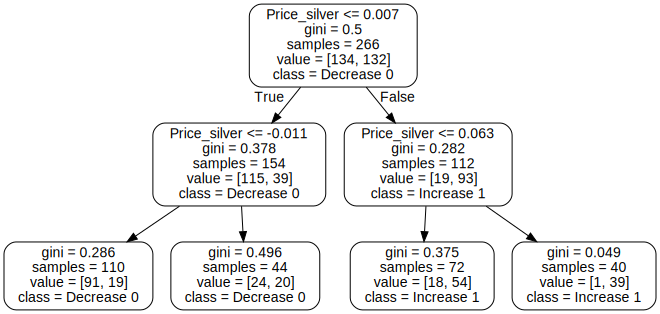

In [30]:
feature_names = list(X_dt.columns)

dot_data = tree.export_graphviz(dt_clf,out_file=None,filled=None,
                                feature_names=feature_names,impurity=True,rounded=True,
                                class_names=['Decrease 0','Increase 1'])
graph = graphviz.Source(dot_data)
graph

In [31]:
dt_clf.score(X1_train,y_train)

0.7819548872180451

In [32]:
# Find out the most optimal hyperparameter of the model by using GridSearchCV

params = {'max_depth':[1,2,4,6,8,10,12,16,20,24,30,50],
         'min_samples_split':[2,4,8,16,24,30]}

grid_dt = GridSearchCV(dt, param_grid = params, cv=10, scoring = 'accuracy')
grid_dt.fit(X_dt,y_dt)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=77),
             param_grid={'max_depth': [1, 2, 4, 6, 8, 10, 12, 16, 20, 24, 30,
                                       50],
                         'min_samples_split': [2, 4, 8, 16, 24, 30]},
             scoring='accuracy')

In [33]:
df_grid = pd.DataFrame(grid_dt.cv_results_)
df_grid[['params','mean_test_score','rank_test_score']].sort_values(['rank_test_score'])

params  mean_test_score  \
0    {'max_depth': 1, 'min_samples_split': 2}         0.753276   
1    {'max_depth': 1, 'min_samples_split': 4}         0.753276   
2    {'max_depth': 1, 'min_samples_split': 8}         0.753276   
3   {'max_depth': 1, 'min_samples_split': 16}         0.753276   
4   {'max_depth': 1, 'min_samples_split': 24}         0.753276   
..                                        ...              ...   
56  {'max_depth': 24, 'min_samples_split': 8}         0.678063   
50  {'max_depth': 20, 'min_samples_split': 8}         0.678063   
54  {'max_depth': 24, 'min_samples_split': 2}         0.674644   
60  {'max_depth': 30, 'min_samples_split': 2}         0.674644   
66  {'max_depth': 50, 'min_samples_split': 2}         0.674644   

    rank_test_score  
0                 1  
1                 1  
2                 1  
3                 1  
4                 1  
..              ...  
56               66  
50               66  
54               70  
60               70  
66               70  

[72 rows x 3 columns]

In [34]:
print('Best score:',str(np.round(grid_dt.best_score_,4)))
print('Most optimal parameter:',str(grid_dt.best_params_))
print('Most optimal estimator:',str(grid_dt.best_estimator_))

Best score: 0.7533
Most optimal parameter: {'max_depth': 1, 'min_samples_split': 2}
Most optimal estimator: DecisionTreeClassifier(max_depth=1, random_state=77)


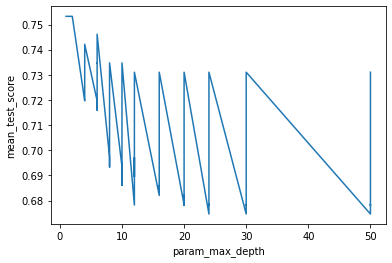

In [35]:
plt.plot(df_grid['param_max_depth'],df_grid['mean_test_score'])
plt.xlabel('param_max_depth')
plt.ylabel('mean_test_score')
plt.show()

In [36]:
# A model with hyperparmeter tuning

best_grid_dt = grid_dt.best_estimator_
best_grid_dt.fit(X_dt,y_dt)

DecisionTreeClassifier(max_depth=1, random_state=77)

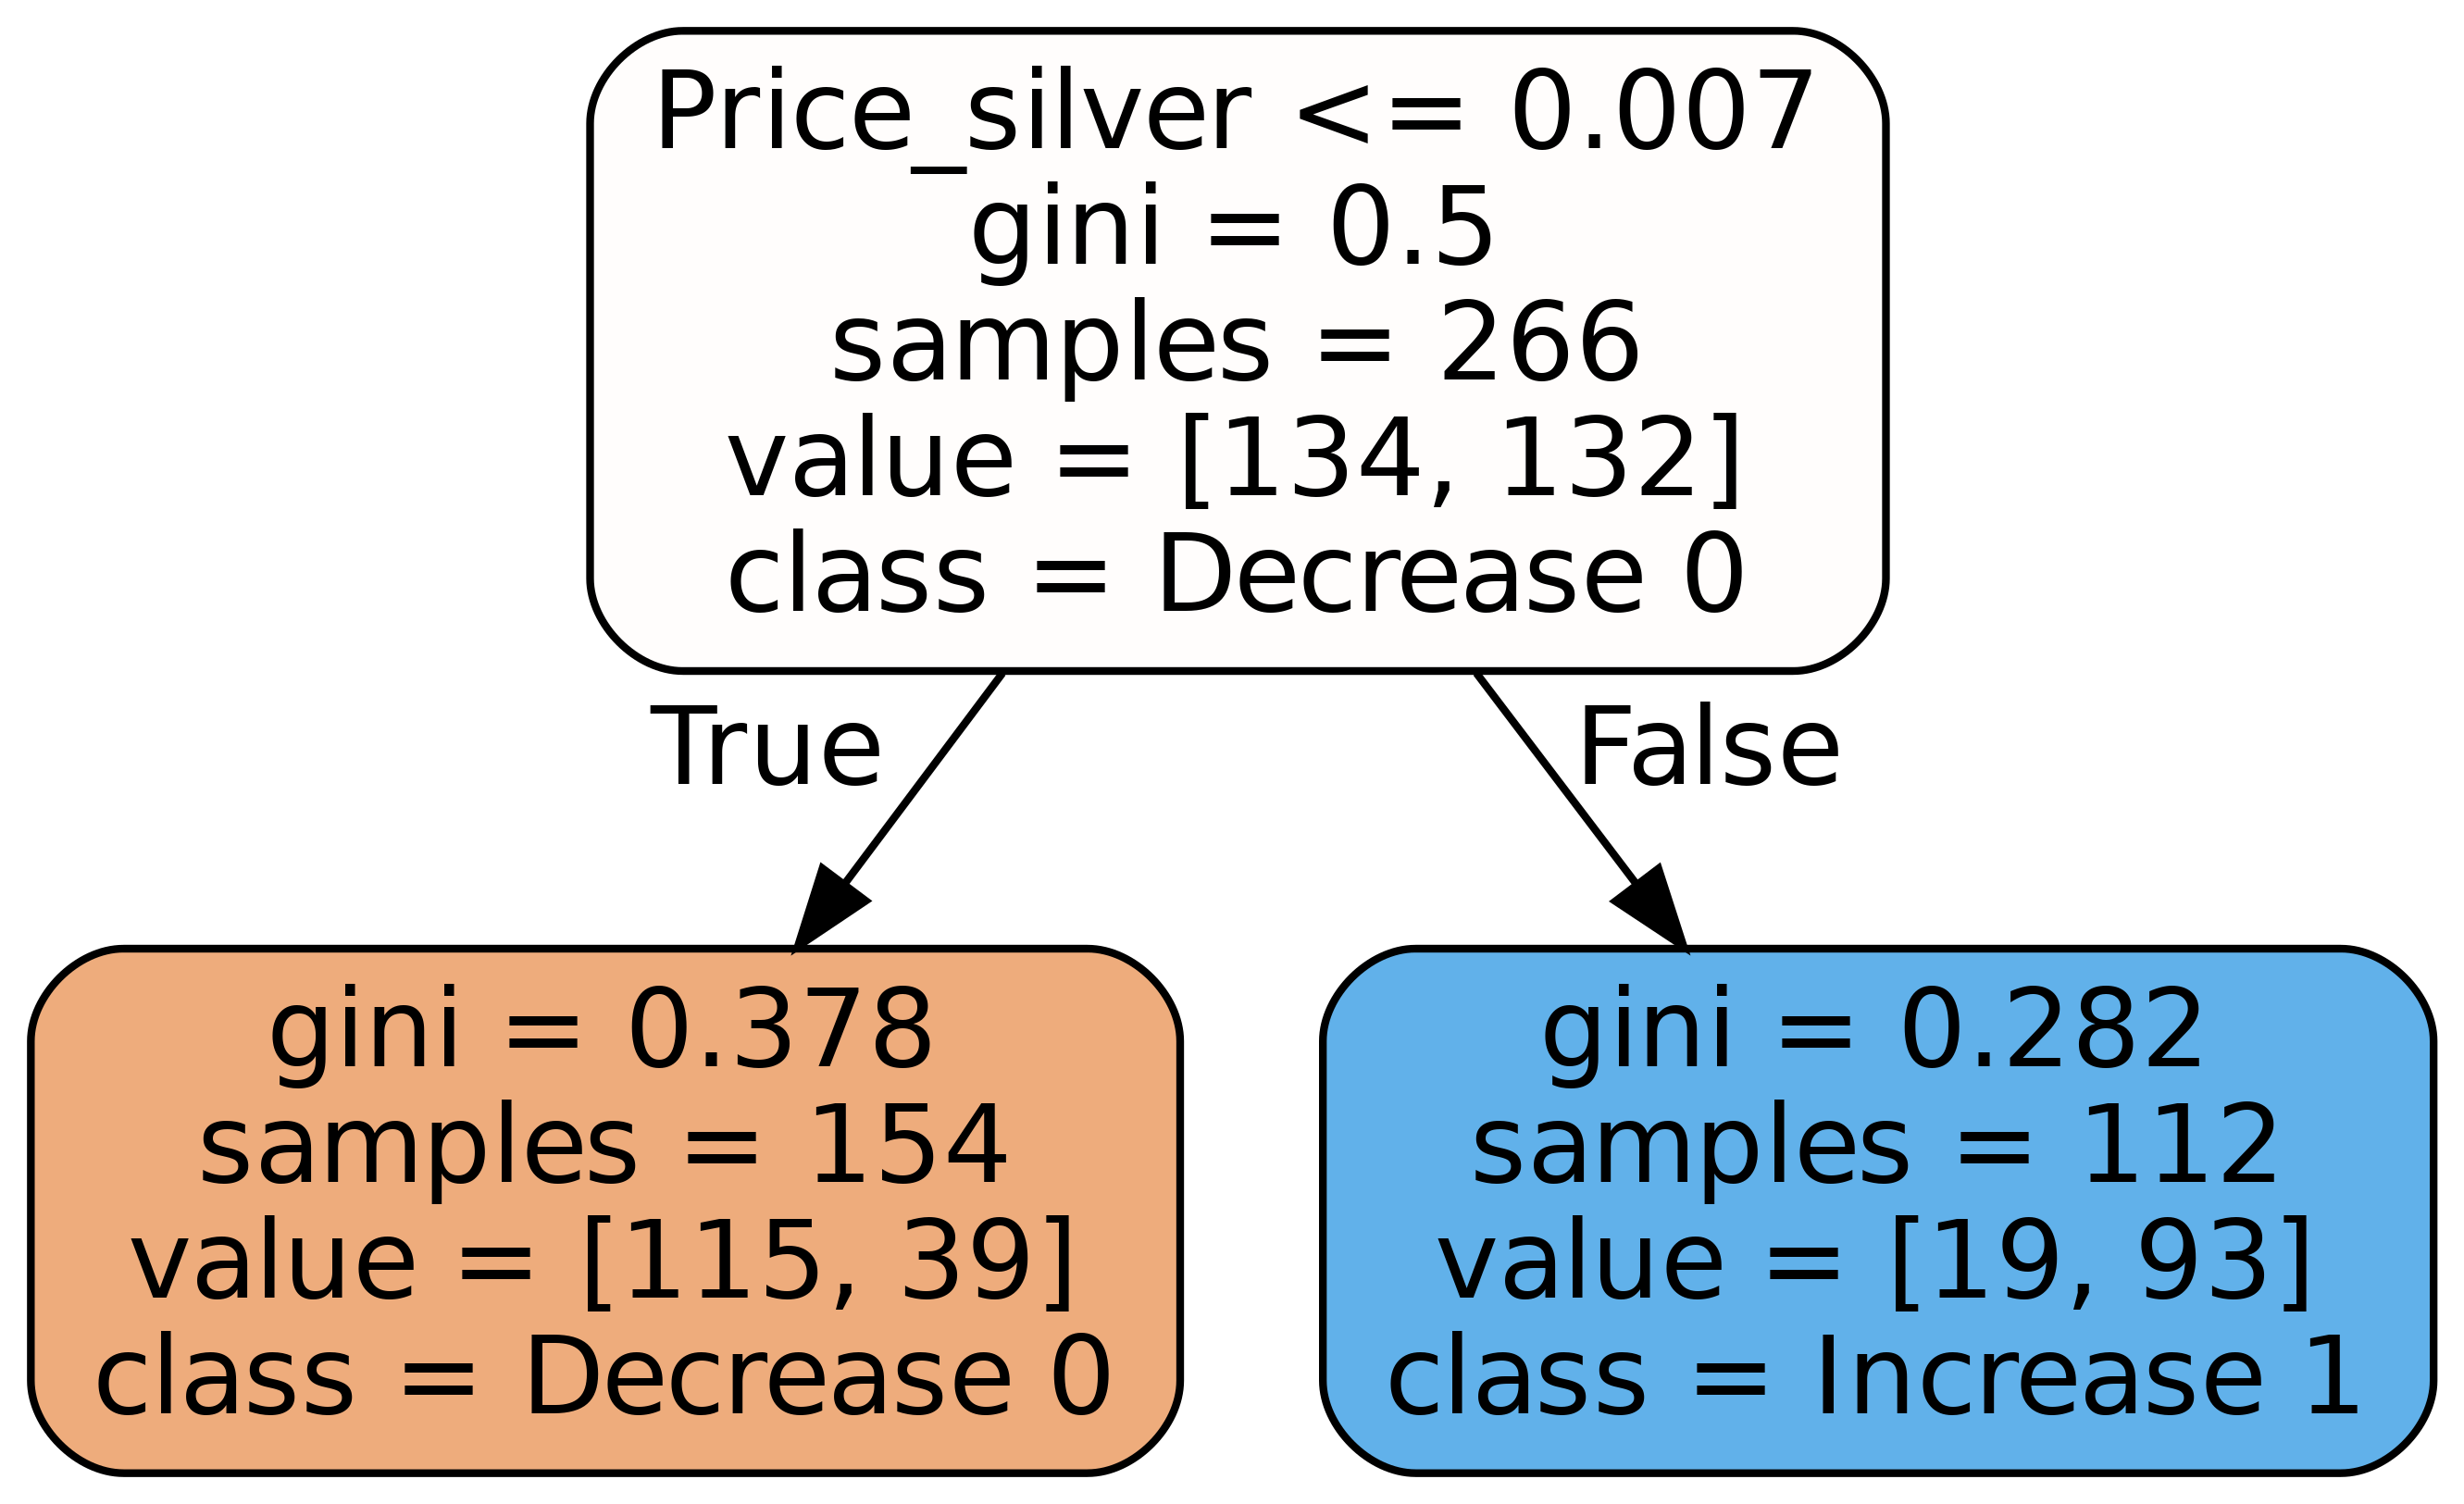

In [37]:
tree.export_graphviz(best_grid_dt,out_file='tree.dot',filled=True,
                    feature_names = feature_names, impurity = True,
                    rounded=True, class_names = ['Decrease 0', 'Increase 1'])
call(['dot','-Tpng','tree.dot','-o','tree.png','-Gdpi=600'])
Image(filename = 'tree.png')

In [38]:
best_grid_dt.score(X1_test,y_test)

0.8481012658227848

This is the most simple and accurate model of this notebook

## Random Forest Classifier

did not run this model 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate

X_rf = X1_train
y_rf = y_train

scores = cross_validate(RandomForestClassifier(random_state=0),X_rf,y_rf,scoring=['accuracy','roc_auc'],return_train_score=True,cv=5)
np.transpose(pd.DataFrame(scores))

In [ ]:
print('RandomForestTrainAverageAccuracy:',np.round(np.mean(scores['train_accuracy']),4))
print('RandomForestTestnAverageAccuracy:',np.round(np.mean(scores['test_accuracy']),4))

This model seems overfitted so hyperparameter tuning is necessary

In [ ]:
# For GridSearchCV parameters
grid_learn = [0.0001,0.0001,0.01,0.03,0.05,0.1,0.2,0.25,0.5,1]
grid_n_estimator = [10,50,100,300,500]
grid_ratio = [0.1,0.25,0.5,0.75,1.0]
grid_max_features = [0.3,0.5,0.7,1.0]
grid_max_depth = [1,2,4,8]
grid_min_samples_leaf = [1,2,3,10,100,1500]
grid_min_samples_split = [2,4,8,16,24,30]
grid_seed = [0]

In [ ]:
# Find out the most optimal hyperparameter of the model by using GridSearchCV

rf_param = {'n_estimators':grid_n_estimator,
            'random_state':grid_seed,
            'max_depth':grid_max_depth,
           'min_samples_leaf':grid_min_samples_leaf,
           'min_samples_split':grid_min_samples_split}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=0),param_grid = rf_param,
                      return_train_score = True, n_jobs = 1, cv=5,scoring='accuracy')

grid_rf.fit(X_rf,y_rf)

In [ ]:
df_grid_rf = pd.DataFrame(grid_rf.cv_results_)
df_grid_rf[['params','mean_train_score','mean_test_score','rank_test_score']].sort_values(['rank_test_score'])

In [ ]:
print('Best Score :',str(np.round(grid_rf.best_score_,4)))
print('Optimal Parameters:',str(grid_rf.best_params_))
print('Optimal Estimators:',str(grid_rf.best_estimator_))

In [ ]:
best_grid_rf = grid_rf.best_estimator_
best_grid_rf.fit(X_rf,y_rf)

pred_rf = best_grid_rf.predict(X_rf)
accuracy_rf = accuracy_score(y_rf,pred_rf)
print(np.round(accuracy_rf,4))